# **1. Introduction 👋**

<center><img src="https://images.unsplash.com/photo-1551260627-fd1b6daa6224?auto=format&fit=crop&q=80&w=1467&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Loan Picture" width="600" height="600"></center><br>

## Data Set Problems 🤔

👉 Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict whether the person will deposit money or not

👨‍💻 **The machine learning models used in this project are:** 
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Decision Tree
4. Random Forest


---

## Data Set Description 🧾
👉 There are **17 variables** in this data set:
*   **7 categorical** variables,
*   **10 continuous** variables

<br>


# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Feature	Defination	Type
Age	Customer's age	Numeric: '59','34','32'
Job	Customer's job	Categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired'..)
Marital	Customer's marital status	Categorical: 'divorced','married','single','unknown'
Education	Customer education level	Categorical: 'primary', 'secondary', 'tertiary' ve 'unknown'
Default	Does the customer already have a loan?	Categorical: 'no','yes'
Housing	Does the client have a home loan?	Categorical: 'no','yes'
Loan	Does the customer have a personal loan?	Categorical: 'no','yes'
Balance	Customer's individual balance	Numeric: '1270','2343','45'
Contact	Customer's contact type	Categorical: 'cellular','telephone','unknown'
Month	Last contact month of the year	Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
Day	Last contact day of the week
Duration	Last contact time, in seconds	Numeric
Campaign	Number of contacts performed during this campaign and for this customer	Numeric
Pdays	Number of days since the customer was last contacted from a previous campaign	Numeric (probably -1 means the customer has not been contacted before)
Previous	Number of contacts performed before this campaign and for this customer	Numeric
Poutcome	Result of previous marketing campaign	Categorical: 'failure','nonexistent','success','other'
Deposit -did the customer get a loan?	Binary: 'yes','no'

# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [2]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv" , sep=",", encoding='utf-8')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# 4. Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


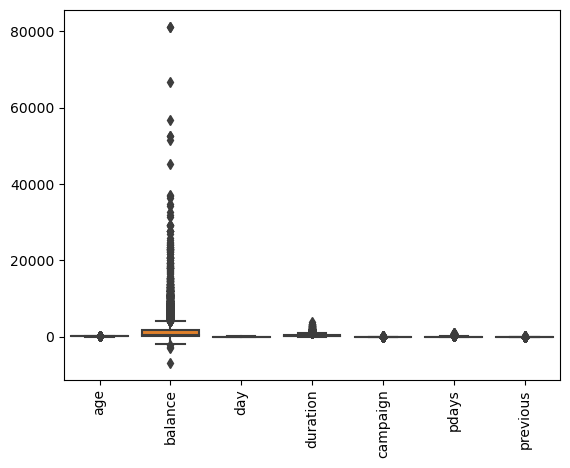

In [6]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


# The most existing age group 

In [8]:
df["age"].value_counts().head(15)

31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
29    328
40    326
41    299
42    295
28    292
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

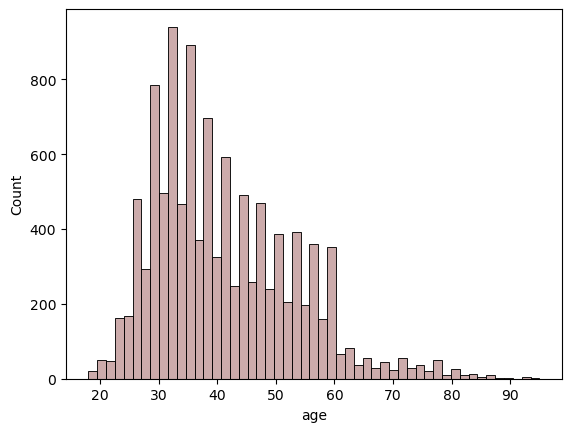

In [9]:
sns.histplot(x="age",data=df ,color = 'rosybrown')

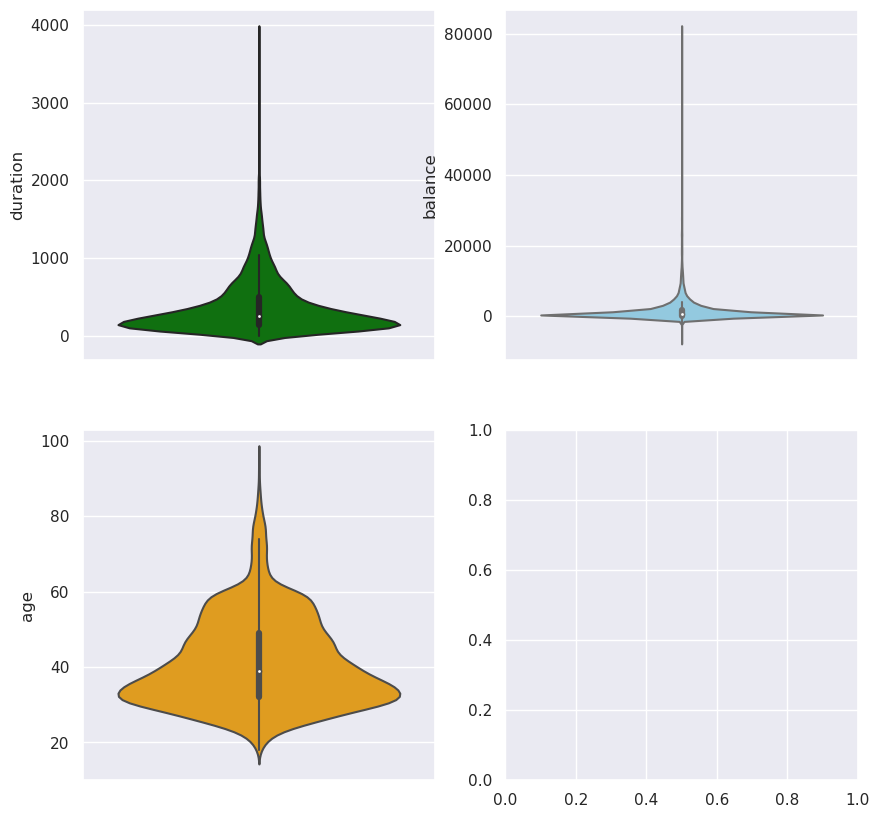

In [10]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="duration", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="balance", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="age", ax=axs1[1, 0], color='orange');

# types of jobs

In [11]:
df["job"].describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

In [12]:
df["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

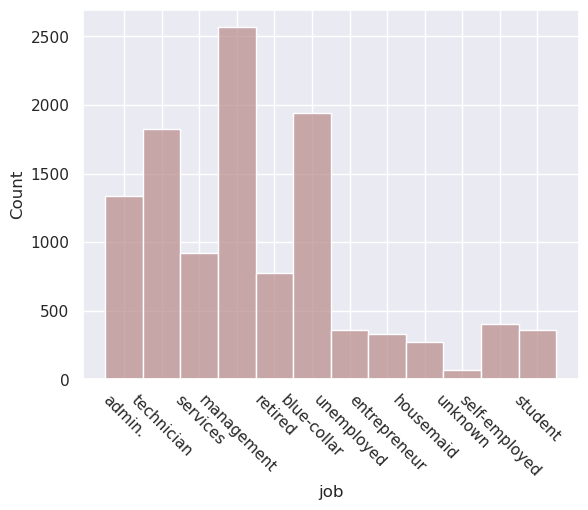

In [13]:
sns.histplot(x="job", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

In [14]:
fig = px.pie(df, values=np.ones(11162), names='job', title='job',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()


<Axes: xlabel='marital', ylabel='count'>

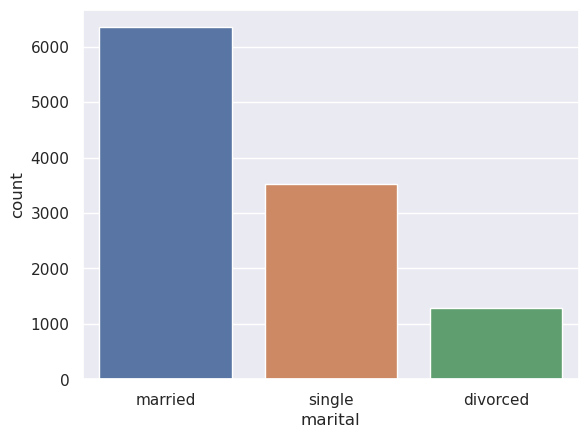

In [15]:
sns.countplot(x="marital", data=df)

In [16]:
fig = px.pie(df, values=np.ones(11162), names='marital', title='marital',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()


<Axes: xlabel='marital', ylabel='count'>

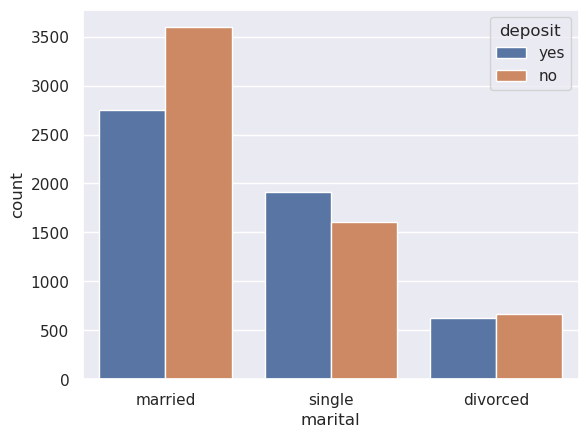

In [17]:
sns.countplot(x="marital", data=df, hue="deposit")

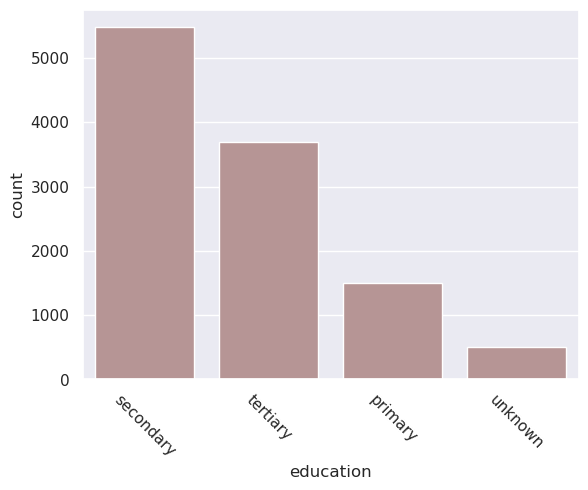

In [18]:
sns.countplot(x="education", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

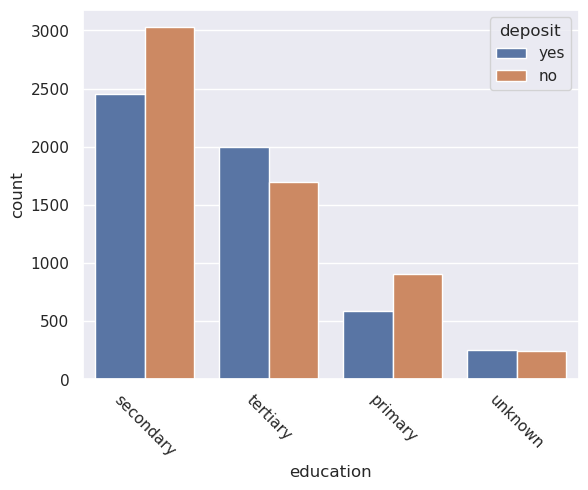

In [19]:
sns.countplot(x="education", data=df, hue="deposit")
plt.xticks(rotation=-45)
plt.show()

In [20]:
fig = px.pie(df, values=np.ones(11162), names='education', title='education',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

In [21]:
df["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

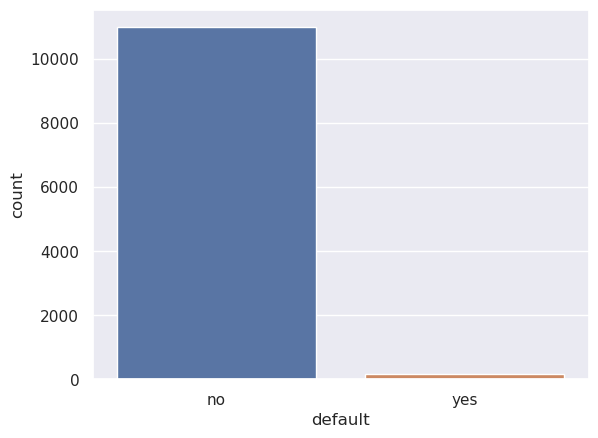

In [22]:
sns.countplot(x="default", data=df)

<Axes: xlabel='default', ylabel='count'>

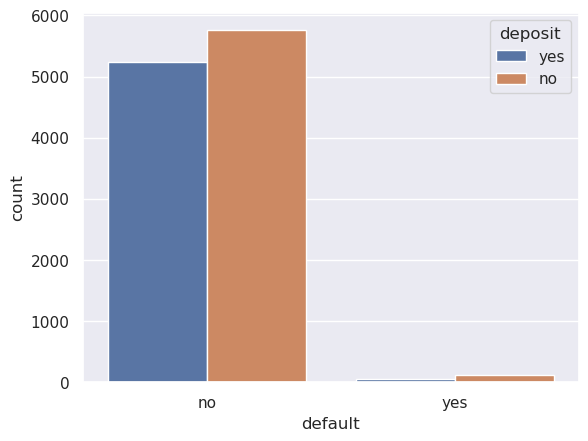

In [23]:
sns.countplot(x="default", data=df, hue="deposit")

In [24]:
df["balance"].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

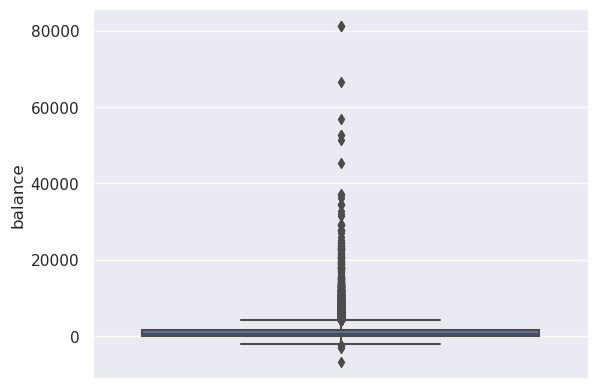

In [25]:
sns.boxplot(y="balance",data=df)

In [26]:
df.loc[df["balance"] > 40000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2468,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3236,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
4210,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
8208,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
10143,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
10585,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,no


In [27]:
df.drop(df[df["balance"] > 40000].index, inplace=True)

<Axes: xlabel='balance', ylabel='Density'>

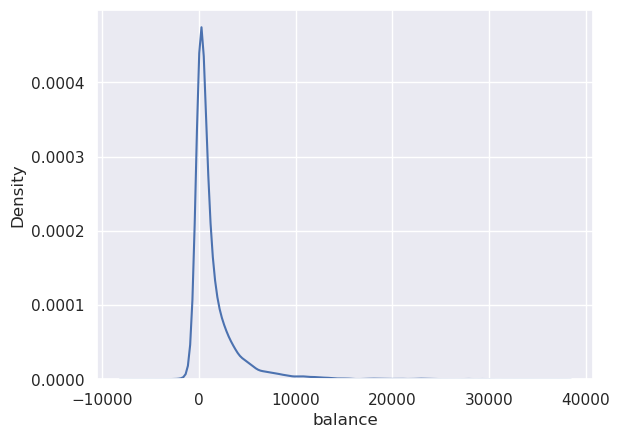

In [28]:
sns.kdeplot(x="balance",data =df)

<Axes: xlabel='housing', ylabel='count'>

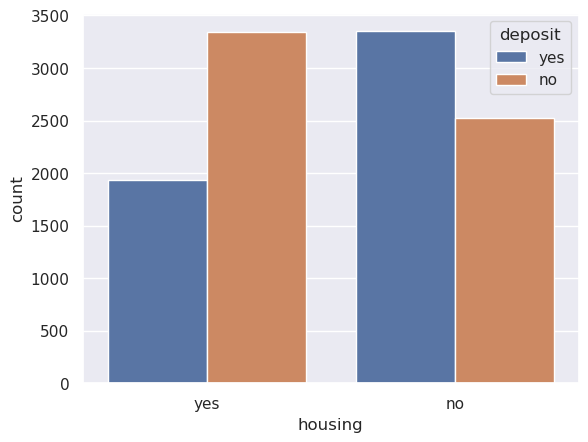

In [29]:
sns.countplot(x="housing", data=df, hue="deposit")

In [30]:
fig = px.pie(df, values=np.ones(11154), names='housing', title='housing',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [31]:
df['loan'].value_counts()

no     9695
yes    1459
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

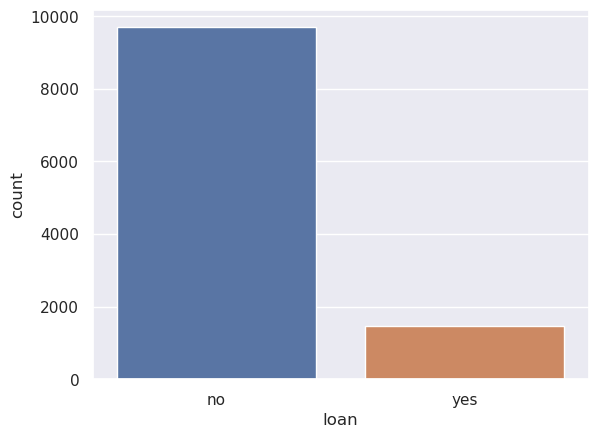

In [32]:
sns.countplot(x="loan", data=df)

<Axes: xlabel='loan', ylabel='count'>

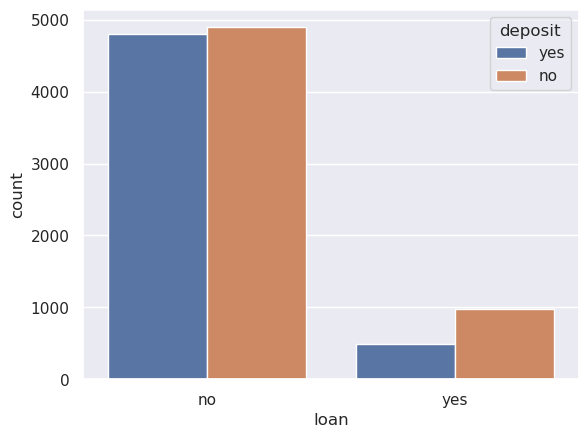

In [33]:
sns.countplot(x="loan", data=df, hue="deposit")

In [34]:
df["duration"].info()

<class 'pandas.core.series.Series'>
Int64Index: 11154 entries, 0 to 11161
Series name: duration
Non-Null Count  Dtype
--------------  -----
11154 non-null  int64
dtypes: int64(1)
memory usage: 174.3 KB


In [35]:
df["duration"].describe()

count    11154.000000
mean       371.897257
std        347.026223
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Density'>

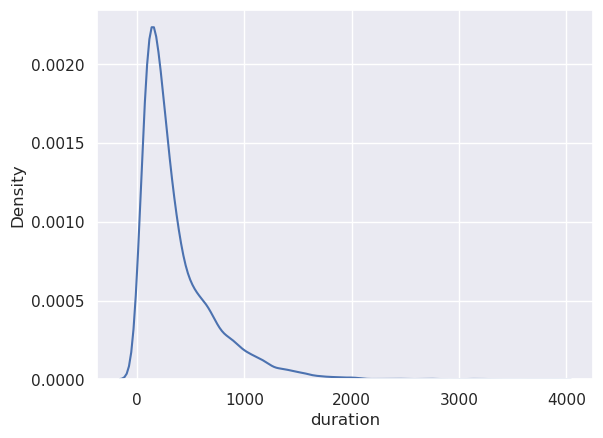

In [36]:
sns.kdeplot(x="duration",data =df)

<Axes: xlabel='duration', ylabel='Density'>

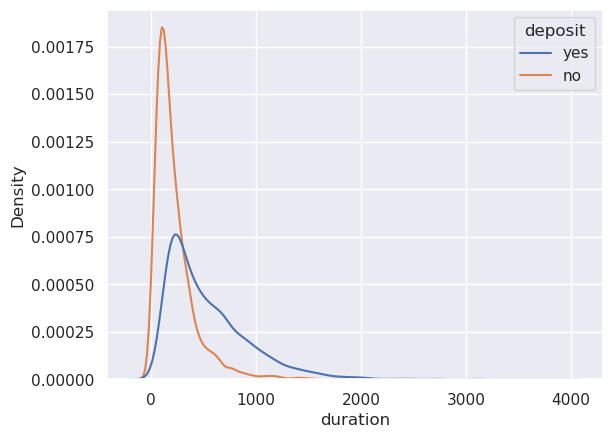

In [37]:
sns.kdeplot(x="duration",data =df,hue ="deposit")

In [38]:
df["campaign"].value_counts()[:5]

1    4792
2    3028
3    1319
4     771
5     378
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='Density'>

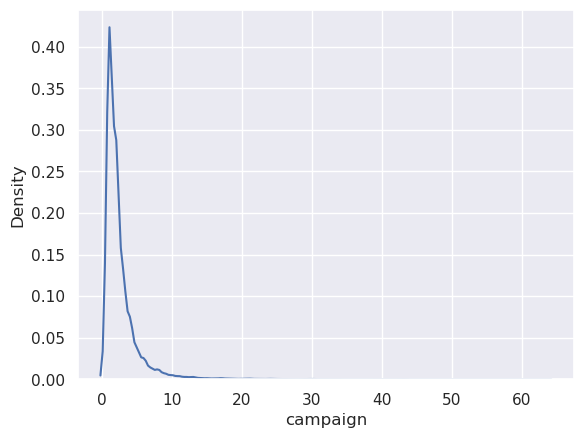

In [39]:
sns.kdeplot(data=df,x="campaign")

<Axes: xlabel='campaign', ylabel='Density'>

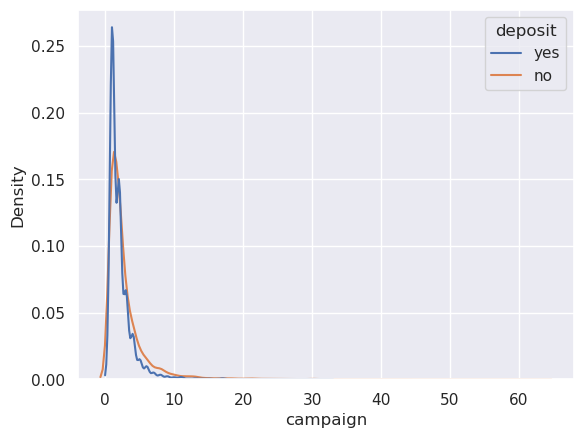

In [40]:
sns.kdeplot(data=df,x="campaign",hue="deposit")

In [41]:
df["poutcome"].info()

<class 'pandas.core.series.Series'>
Int64Index: 11154 entries, 0 to 11161
Series name: poutcome
Non-Null Count  Dtype 
--------------  ----- 
11154 non-null  object
dtypes: object(1)
memory usage: 174.3+ KB


In [42]:
df["poutcome"].describe()

count       11154
unique          4
top       unknown
freq         8321
Name: poutcome, dtype: object

In [43]:
df["poutcome"].value_counts()

unknown    8321
failure    1228
success    1069
other       536
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

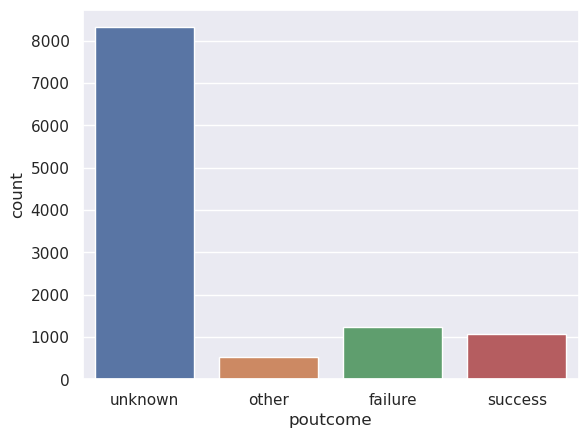

In [44]:
sns.countplot(x="poutcome", data=df)

In [45]:
fig = px.pie(df, values=np.ones(11154), names='poutcome', title='poutcome',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: xlabel='poutcome', ylabel='count'>

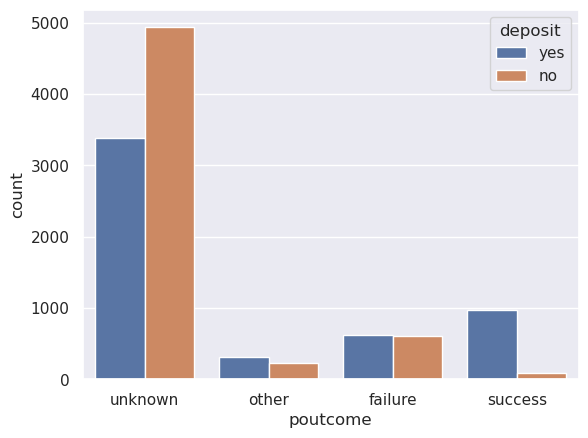

In [46]:
sns.countplot(x="poutcome", data=df, hue="deposit")

In [47]:
df['deposit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 11154 entries, 0 to 11161
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
11154 non-null  object
dtypes: object(1)
memory usage: 174.3+ KB


In [48]:
df['deposit'].describe()

count     11154
unique        2
top          no
freq       5870
Name: deposit, dtype: object

In [49]:
df['deposit'].value_counts()

no     5870
yes    5284
Name: deposit, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

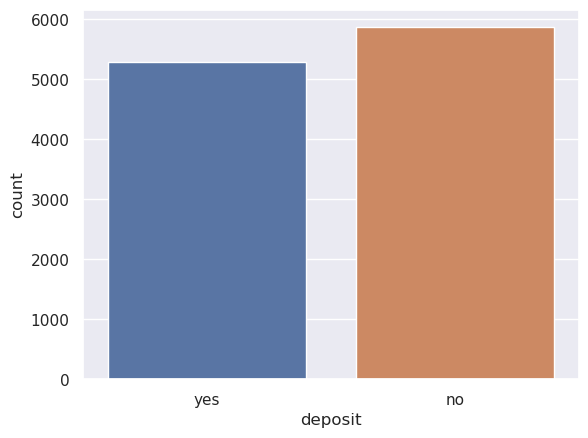

In [50]:
sns.countplot(data=df ,x="deposit")

In [51]:
fig = px.pie(df, values=np.ones(11154), names='deposit', title='deposit',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: >

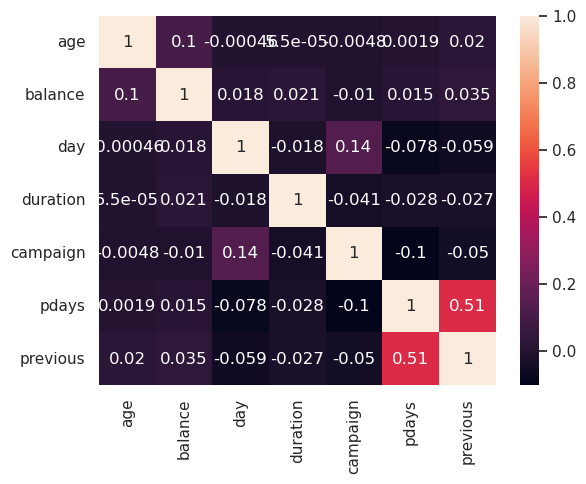

In [52]:
sns.heatmap(df.corr(),annot =True)

# Preprocessing

In [53]:
df.isnull().sum()/df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11154 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11154 non-null  int64 
 1   job        11154 non-null  object
 2   marital    11154 non-null  object
 3   education  11154 non-null  object
 4   default    11154 non-null  object
 5   balance    11154 non-null  int64 
 6   housing    11154 non-null  object
 7   loan       11154 non-null  object
 8   contact    11154 non-null  object
 9   day        11154 non-null  int64 
 10  month      11154 non-null  object
 11  duration   11154 non-null  int64 
 12  campaign   11154 non-null  int64 
 13  pdays      11154 non-null  int64 
 14  previous   11154 non-null  int64 
 15  poutcome   11154 non-null  object
 16  deposit    11154 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


# 5. Data Preprocessing ⚙

In [55]:
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [56]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [58]:
x = df.drop([ 'contact', 'day', 'month','pdays','previous','deposit'],axis =1)

In [59]:
y=df["deposit"]

In [60]:
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,0,2343,1,0,1042,1,3
1,56,0,1,1,0,45,0,0,1467,1,3
2,41,9,1,1,0,1270,1,0,1389,1,3
3,55,7,1,1,0,2476,1,0,579,1,3
4,54,0,1,2,0,184,0,0,673,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,257,1,3
11158,39,7,1,1,0,733,0,0,83,4,3
11159,32,9,2,1,0,29,0,0,156,2,3
11160,43,9,1,1,0,0,0,1,9,2,0


In [61]:
st = StandardScaler()

In [62]:
x["balance"] = st.fit_transform(x[["balance"]])

In [63]:
x["duration"] = st.fit_transform(x[["duration"]])

In [64]:
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,0,0.307815,1,0,1.931072,1,3
1,56,0,1,1,0,-0.517484,0,0,3.155819,1,3
2,41,9,1,1,0,-0.077540,1,0,2.931042,1,3
3,55,7,1,1,0,0.355580,1,0,0.596820,1,3
4,54,0,1,2,0,-0.467564,0,0,0.867705,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,-0.533286,1,0,-0.331106,1,3
11158,39,7,1,1,0,-0.270397,0,0,-0.832531,4,3
11159,32,9,2,1,0,-0.523230,0,0,-0.622163,2,3
11160,43,9,1,1,0,-0.533645,0,1,-1.045781,2,0


## Splitting Data Set 🪓
👉 The data set will be split into **75% train and 25% test**.

In [65]:
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.25 ,random_state= 42)

In [66]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(11154, 11)
(8365, 11)
(2789, 11)


# 6. Models 🛠

### Defining evaluation function

In [67]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(x_train, y_train)  #fit the model instance 


    predictions = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df


## 6.1 Logistic Regression

In [68]:
lg = LogisticRegression(penalty ="l2" ,C=0.5)

results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

In [69]:
results.index = ['LogisticRegression']

In [70]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.770527,0.746835,0.793277,0.705531,0.767996


## 6.2 Decision Tree

In [71]:
decision_tree = DecisionTreeClassifier(max_depth= 5,max_features=4)
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.765149,0.758213,0.749088,0.767564,0.765243
LogisticRegression,0.770527,0.746835,0.793277,0.705531,0.767996


## 6.3 KNN Classifier

In [72]:
KNN = KNeighborsClassifier(n_neighbors=13,metric="minkowski")

In [73]:
knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

In [74]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.765149,0.758213,0.749088,0.767564,0.765243
LogisticRegression,0.770527,0.746835,0.793277,0.705531,0.767996
KNearsNeighbors,0.736106,0.709779,0.751252,0.672646,0.733635


## 6.4 Random Forest

In [75]:
rfc = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)

In [76]:
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

In [77]:
results.sort_values(by='f1_score',
ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.803872,0.798229,0.788055,0.808670,0.804059
DecisionTree,0.765149,0.758213,0.749088,0.767564,0.765243
LogisticRegression,0.770527,0.746835,0.793277,0.705531,0.767996
KNearsNeighbors,0.736106,0.709779,0.751252,0.672646,0.733635


# **Final Results **

In [78]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.803872,0.798229,0.788055,0.808670,0.804059
DecisionTree,0.765149,0.758213,0.749088,0.767564,0.765243
LogisticRegression,0.770527,0.746835,0.793277,0.705531,0.767996
KNearsNeighbors,0.736106,0.709779,0.751252,0.672646,0.733635


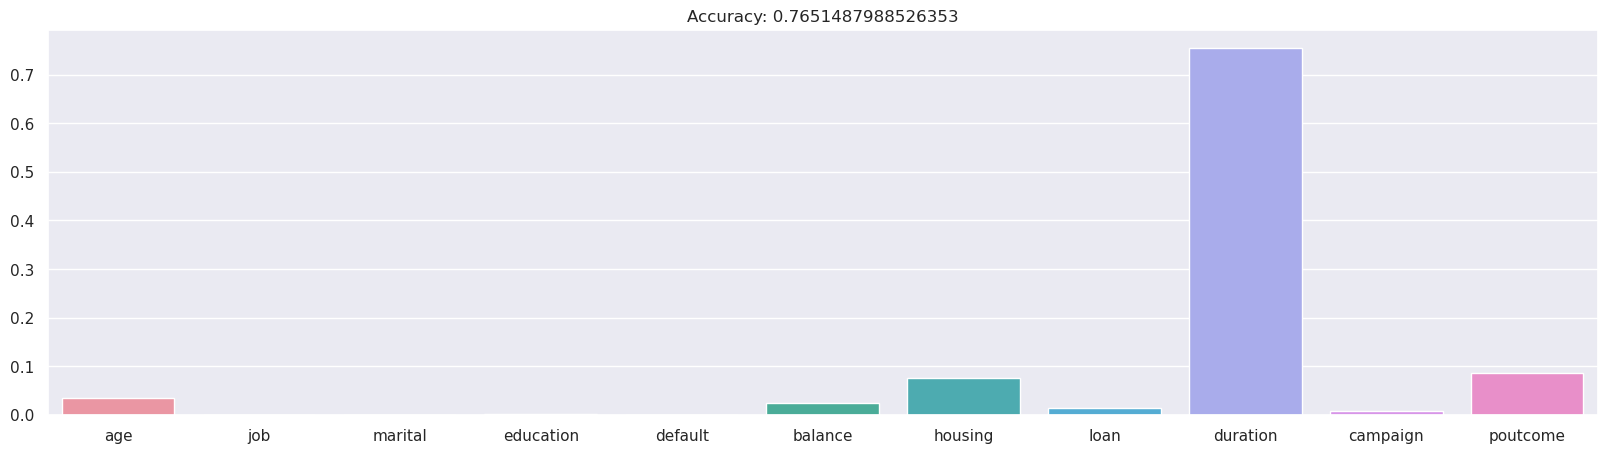

In [79]:
plt.figure(figsize=(20, 5))
fi = pd.Series(decision_tree.feature_importances_, index=x.columns[:])
sns.barplot(x=fi.index, y=fi.values)
score = decision_tree.score(x_test, y_test)
plt.title('Accuracy: ' + str(score))
plt.show()

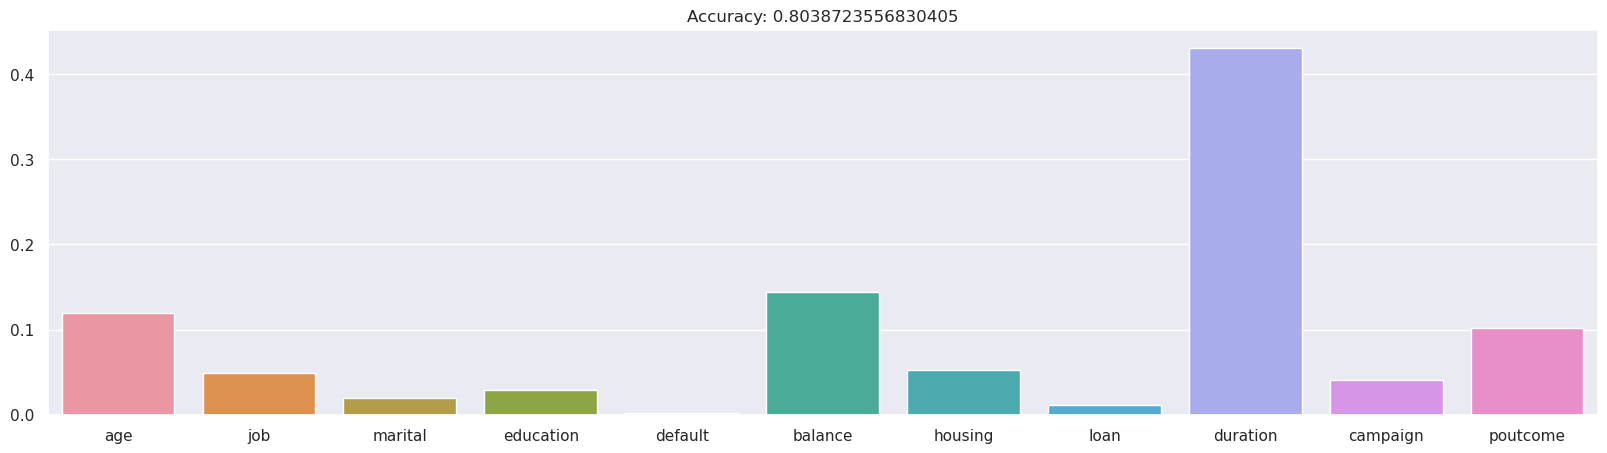

In [80]:
plt.figure(figsize=(20, 5))
fi = pd.Series(rfc.feature_importances_, index=x.columns[:])
sns.barplot(y=fi.values, x=fi.index)
score = rfc.score(x_test, y_test)
plt.title('Accuracy: ' + str(score))
plt.show()

# 👉 In general, it can be seen that **all models can achieve up to 70% accuracy**. <br>
# 👉 The highest accuracy is **80%%**. <br><br>
